In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [56]:
# Путь к файлу на Google Drive
file_path = '/content/drive/MyDrive/Crashes.csv'

# Чтение CSV-файла с указанием разделителя ";"
dataset = pd.read_csv(file_path, sep=';')

# Вывод списка колонок для проверки
print(dataset.columns)


Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Route', 'Type',
       'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')


In [57]:
dataset.head(10)

,index,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,Schutte-Lanz S-L-10 (airship),20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,Zeppelin L-32 (airship),22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,Zeppelin L-31 (airship),19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       5268 non-null   int64  
 1   Date        5268 non-null   object 
 2   Time        3049 non-null   object 
 3   Location    5248 non-null   object 
 4   Operator    5250 non-null   object 
 5   Route       3561 non-null   object 
 6   Type        5241 non-null   object 
 7   Aboard      5246 non-null   float64
 8   Fatalities  5256 non-null   float64
 9   Ground      5246 non-null   float64
 10  Summary     4878 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 452.8+ KB


In [59]:
dataset.describe()

,index,Aboard,Fatalities,Ground
count,5268.00000,5246.000000,5256.000000,5246.000000
mean,2633.50000,27.554518,20.068303,1.608845
std,1520.88494,43.076711,33.199952,53.987827
min,0.00000,0.000000,0.000000,0.000000
25%,1316.75000,5.000000,3.000000,0.000000
50%,2633.50000,13.000000,9.000000,0.000000
75%,3950.25000,30.000000,23.000000,0.000000
max,5267.00000,644.000000,583.000000,2750.000000


In [60]:
dataset['Operator'].unique()

array(['Military - U.S. Army', 'Military - U.S. Navy', 'Private', ...,
       'Aerotuy airline', 'Bako Air', 'Strait Air'], dtype=object)

In [61]:
dataset['Operator'].value_counts()

,count
Operator,
Aeroflot,179
Military - U.S. Air Force,176
Air France,70
Deutsche Lufthansa,65
Air Taxi,44
...,...
Military - Argentine Navy,1
Richland Flying Service - Air Taxii,1
Harbor Airlines - Air Taxi,1


**Визуализация**

In [62]:
# Проверка пропущенных значений в столбцах
print(dataset[['Aboard', 'Fatalities', 'Ground']].isnull().sum())

# Проверка, что все значения в этих столбцах числовые
print(dataset[['Aboard', 'Fatalities', 'Ground']].dtypes)


Aboard        22
Fatalities    12
Ground        22
dtype: int64
Aboard        float64
Fatalities    float64
Ground        float64
dtype: object


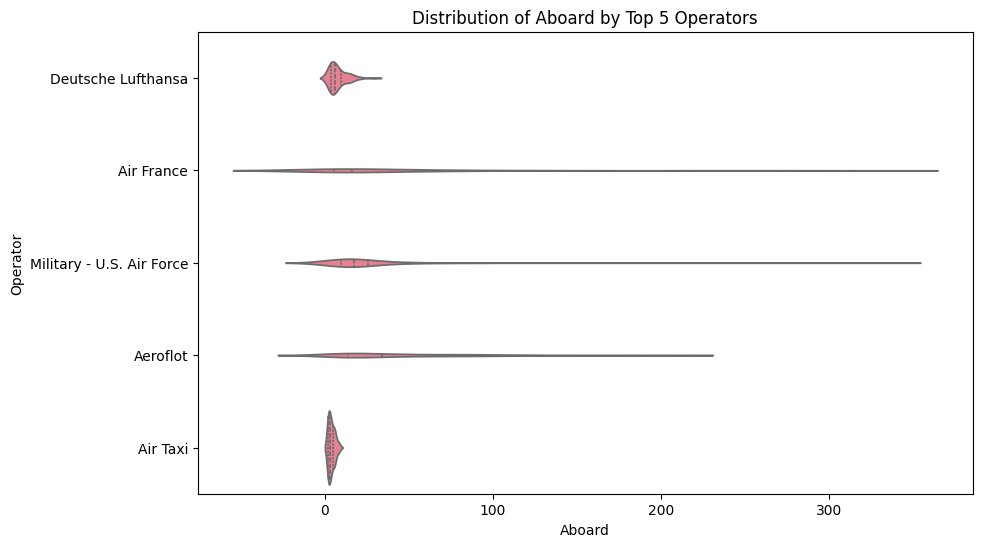

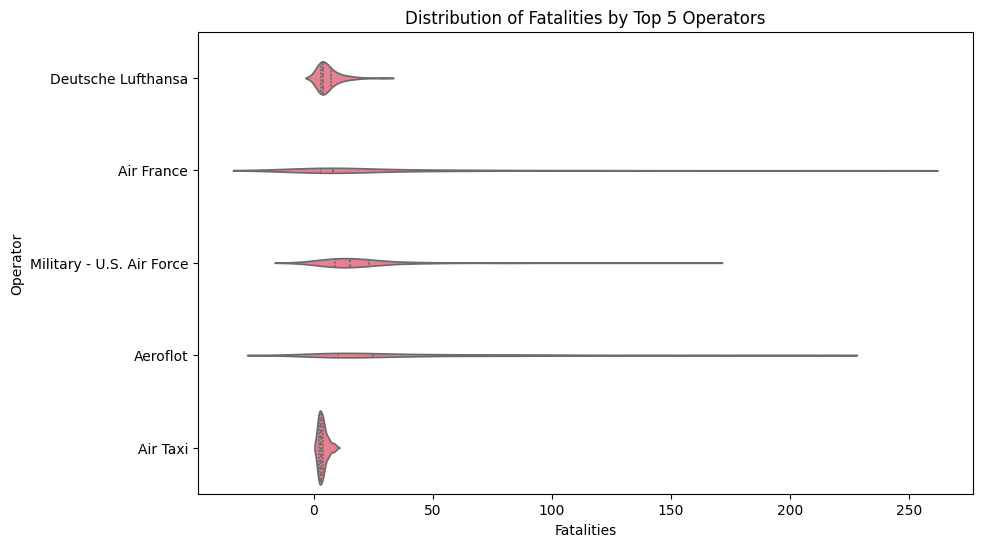

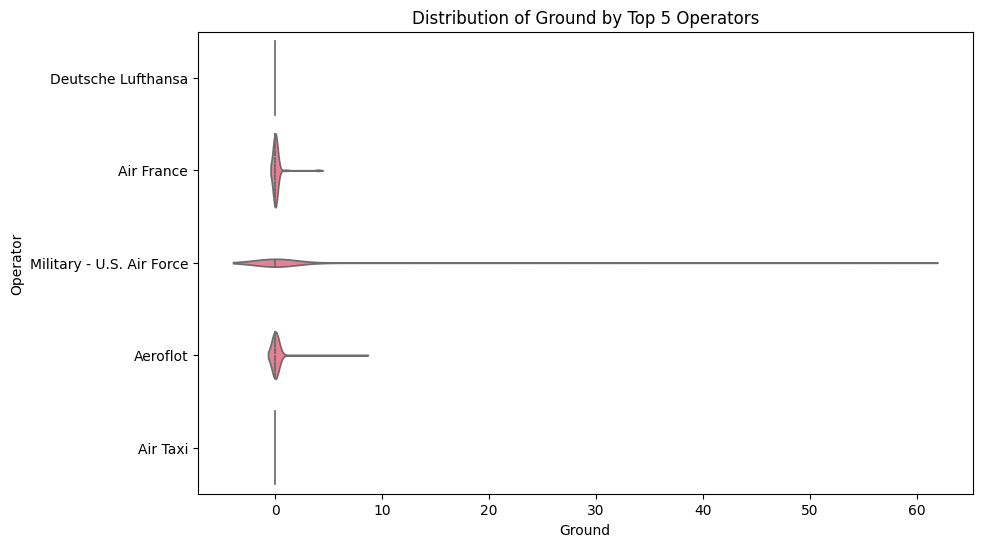

In [63]:
# Удаление строк с пропущенными значениями в этих столбцах
dataset_clean = dataset.dropna(subset=['Aboard', 'Fatalities', 'Ground'])
# Выбор 5 наиболее частых операторов
top_operators = dataset_clean['Operator'].value_counts().nlargest(5).index
# Фильтр данных для этих операторов
filtered_data = dataset_clean[dataset_clean['Operator'].isin(top_operators)]

# Построение графиков для топ-5 операторов
plt.figure(figsize=(10, 6))
sns.violinplot(y='Operator', x='Aboard', data=filtered_data, inner='quartile')
plt.title('Distribution of Aboard by Top 5 Operators')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(y='Operator', x='Fatalities', data=filtered_data, inner='quartile')
plt.title('Distribution of Fatalities by Top 5 Operators')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(y='Operator', x='Ground', data=filtered_data, inner='quartile')
plt.title('Distribution of Ground by Top 5 Operators')
plt.show()


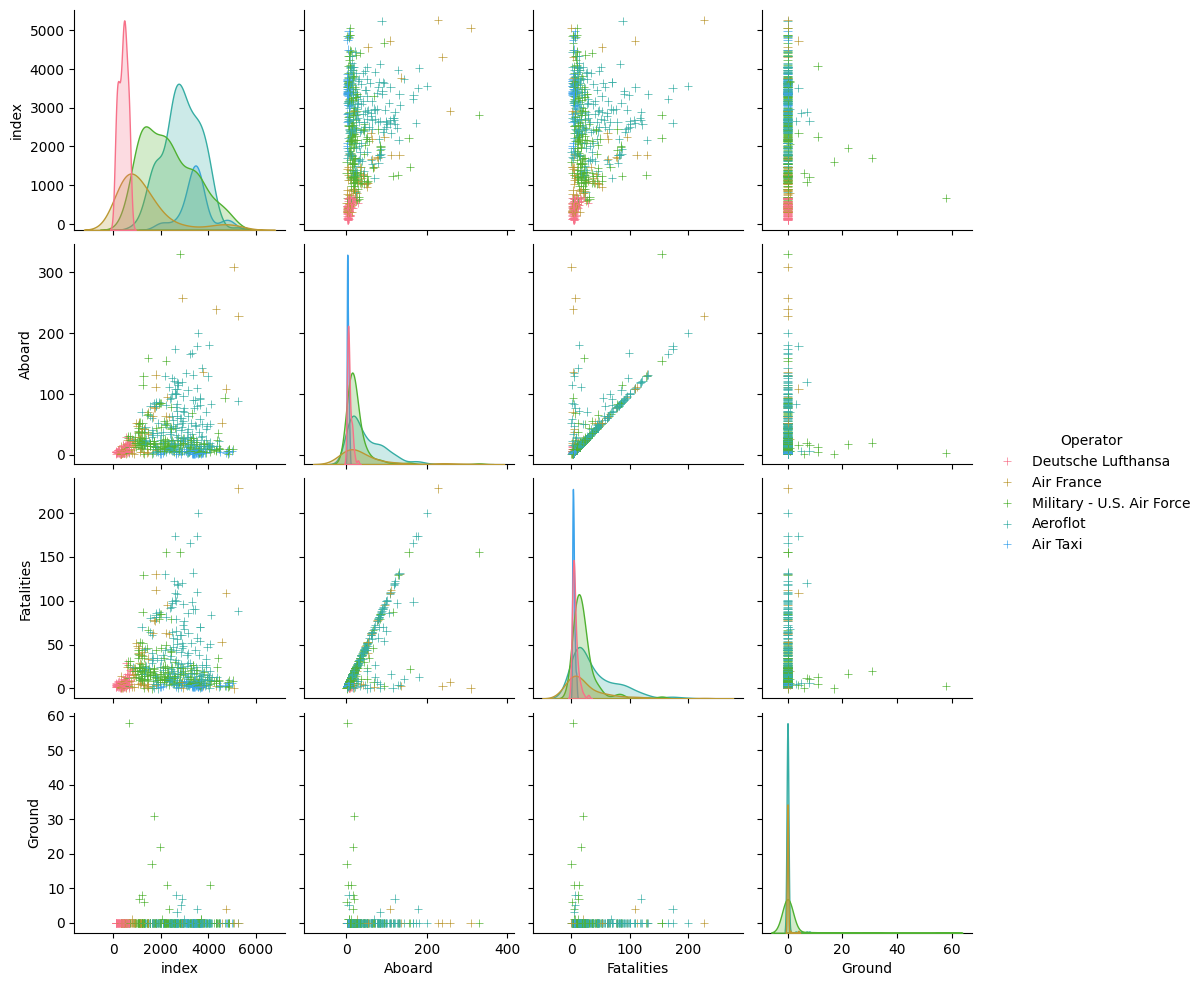

In [64]:
# Парный график
#Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

# Отбор топ-5 операторов по количеству записей
top_operators = dataset['Operator'].value_counts().nlargest(5).index

# Фильтрация данных для этих операторов
filtered_data = dataset[dataset['Operator'].isin(top_operators)]

# Построение парного графика с hue по столбцу 'Operator'
sns.pairplot(filtered_data, hue='Operator', markers='+')
plt.show()


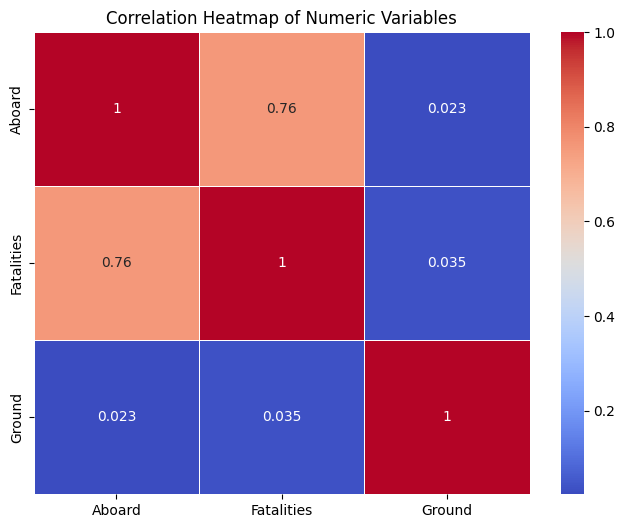

In [65]:
# Выбор только числовых столбцов для корреляции
numeric_columns = ['Aboard', 'Fatalities', 'Ground']

# Рассчет корреляционной матрицы
corr_matrix = dataset[numeric_columns].corr()

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


**Разделение данных**

In [109]:
X = dataset.drop(['Fatalities'], axis=1)
y = dataset['Fatalities']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

# Разделение данных на обучающую и тестовую выборки
X = dataset.drop(columns=['Fatalities'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True)

# Выполнение t-теста для сравнения средних значений
t_stat, p_val = stats.ttest_ind(y_train, y_test)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

X shape: (5268, 10) | y shape: (5268,) 
T-statistic: nan
P-value: nan


In [110]:
print("NaN values in y_train:", y_train.isna().sum())
print("NaN values in y_test:", y_test.isna().sum())


NaN values in y_train: 9
NaN values in y_test: 3


In [111]:
y_train_clean = y_train.dropna()
y_test_clean = y_test.dropna()


In [112]:
print("Number of samples in cleaned y_train:", len(y_train_clean))
print("Number of samples in cleaned y_test:", len(y_test_clean))


Number of samples in cleaned y_train: 3678
Number of samples in cleaned y_test: 1578


In [115]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(y_train_clean, y_test_clean)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: 0.013397435216806317
P-value: 0.9893112217342827
